# **INCEPTION-V3**

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras_preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt

Membagi data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = os.path.join(r'/content/drive/MyDrive/Ikan_air_payau', '')

for dir in os.listdir(dataset):
  class_dir = os.path.join(dataset, dir)
  print('total images for', dir, 'is', len(os.listdir(class_dir)))

total images for Ikan_Belanak is 100
total images for Ikan_Kakap_Putih is 100
total images for Ikan_Mujair is 100
total images for Ikan_Bandeng is 100


In [ ]:
home = '/content/drive/MyDrive/'
root_dir = '/content/drive/MyDrive/Ikan_air_payau/'
classes_dir = os.listdir(root_dir)

train_ratio = 0.8

for cls in classes_dir:
    os.makedirs(home +'train_dir/' + cls, exist_ok=True)
    os.makedirs(home +'test_dir/' + cls, exist_ok=True)

    src = root_dir + cls
    FileNames = os.listdir(src)

    np.random.shuffle(FileNames)
    train_FileNames, test_FileNames = np.split(np.array(FileNames),
                                                [int(train_ratio * len(FileNames))])

    train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
    test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
    print("\n Total images: ",cls, len(FileNames),
          '\n Training: ', len(train_FileNames),
          '\n Testing: ', len(test_FileNames))

    for name in train_FileNames:
      shutil.copy(name, home +'train_dir/' + cls)
    for name in test_FileNames:
      shutil.copy(name, home +'test_dir/' + cls)


 Total images:  Ikan_Belanak 100 
 Training:  80 
 Testing:  20

 Total images:  Ikan_Kakap_Putih 100 
 Training:  80 
 Testing:  20

 Total images:  Ikan_Mujair 100 
 Training:  80 
 Testing:  20

 Total images:  Ikan_Bandeng 100 
 Training:  80 
 Testing:  20


AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/train_dir_80'
test_dir = '/content/drive/MyDrive/test_dir_20'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30,
                                   shear_range = 0.2,
                                   zoom_range = 0.3
                                   )

test_datagen  = ImageDataGenerator(rescale = 1.0/255
                                   )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=2,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=2,
                                                         class_mode = 'categorical',
                                                         target_size=(150, 150))

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
print(train_datagen)

MODELLING

In [ ]:
pretrained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

last_layer = pretrained_model
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(4, activation='softmax')(x)

In [ ]:
model = Model(pretrained_model.input, x)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

TRAINING DATA

In [ ]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1, mode='auto')

history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=[early])

Epoch 1/100
160/160 [==============================] - 54s 302ms/step - loss: 1.9155 - accuracy: 0.3938
Epoch 2/100
160/160 [==============================] - 48s 298ms/step - loss: 1.1756 - accuracy: 0.5750
Epoch 3/100
160/160 [==============================] - 47s 293ms/step - loss: 0.9917 - accuracy: 0.6469
Epoch 4/100
160/160 [==============================] - 47s 290ms/step - loss: 0.7148 - accuracy: 0.7531
Epoch 5/100
160/160 [==============================] - 49s 306ms/step - loss: 0.6816 - accuracy: 0.7281
Epoch 6/100
160/160 [==============================] - 47s 295ms/step - loss: 0.6695 - accuracy: 0.7500
Epoch 7/100
160/160 [==============================] - 47s 293ms/step - loss: 0.5474 - accuracy: 0.8000
Epoch 8/100
160/160 [==============================] - 46s 290ms/step - loss: 0.4315 - accuracy: 0.8344
Epoch 9/100
160/160 [==============================] - 48s 297ms/step - loss: 0.4089 - accuracy: 0.8375
Epoch 10/100
160/160 [==============================] - 47s 294m

TESTING DATA

In [ ]:
results = model.evaluate(test_generator)

40/40 [==============================] - 7s 125ms/step - loss: 1.3166 - accuracy: 0.6000


EVALUASI MODEL

Text(0.5, 1.0, 'Training loss')

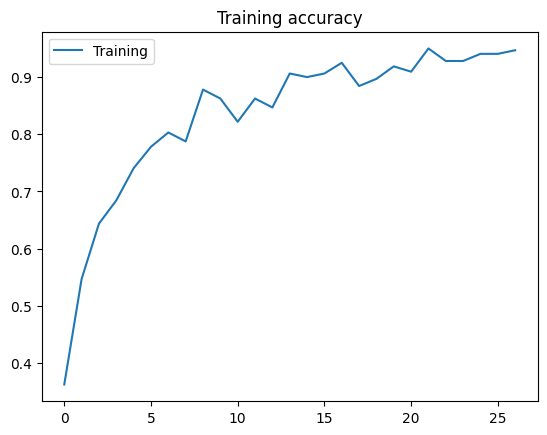

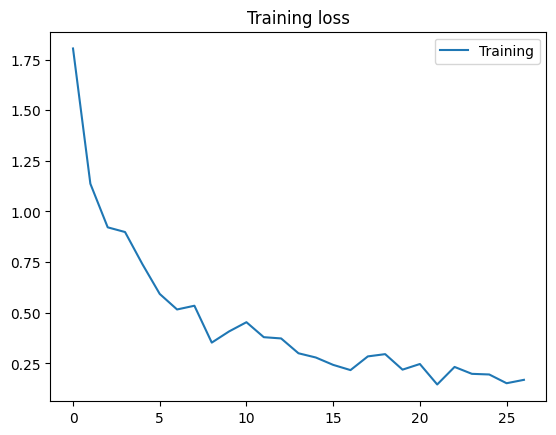

In [ ]:
%matplotlib inline

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
loss     = history.history[    'loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.title ('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.legend()
plt.title ('Training loss')

In [ ]:
prediction=np.round(model.predict(test_generator))

40/40 [==============================] - 16s 294ms/step


In [ ]:
y_train_pred = np.round(model.predict(train_generator))
y_test_pred = np.round(model.predict(test_generator))



40/40 [==============================] - 6s 136ms/step


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

# Menampilkan confusion matrix data training
cm_train = multilabel_confusion_matrix(train_labels, y_train_pred)
print("Confusion Matrix Data Training:")
print(cm_train)

# Menampilkan confusion matrix data testing
cm_test = multilabel_confusion_matrix(test_labels, y_test_pred)
print("Confusion Matrix Data Testing:")
print(cm_test)


Confusion Matrix Data Training:
[[[185  55]
  [ 65  15]]

 [[181  59]
  [ 59  21]]

 [[174  66]
  [ 61  19]]

 [[177  63]
  [ 60  20]]]
Confusion Matrix Data Testing:
[[[54  6]
  [17  3]]

 [[48 12]
  [15  5]]

 [[42 18]
  [11  9]]

 [[39 21]
  [15  5]]]


In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_test_pred).idxmax(axis=1)

from sklearn.metrics import ConfusionMatrixDisplay

ikan = ['ikan bandeng', 'ikan belanak', 'ikan kakap putih', 'ikan mujair']
confusion_matrix= metrics.confusion_matrix(categorical_test_labels, categorical_preds)
print(confusion_matrix)

[[3 3 5 9]
 [2 5 5 8]
 [2 5 9 4]
 [3 4 8 5]]


In [ ]:
prediction

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
train_labels = train_generator.classes
num_classes = len(train_generator.class_indices)
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=num_classes)

In [ ]:
test_labels = test_generator.classes
num_classes = len(test_generator.class_indices)
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
ikan = ['ikan belanak', 'ikan kakap putih', 'ikan mujair','ikan bandeng']
classification_metrics=metrics.classification_report(test_labels, prediction, zero_division=0)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.11      0.05      0.07        20
           1       0.12      0.10      0.11        20
           2       0.26      0.35      0.30        20
           3       0.12      0.15      0.13        20

   micro avg       0.16      0.16      0.16        80
   macro avg       0.15      0.16      0.15        80
weighted avg       0.15      0.16      0.15        80
 samples avg       0.16      0.16      0.16        80



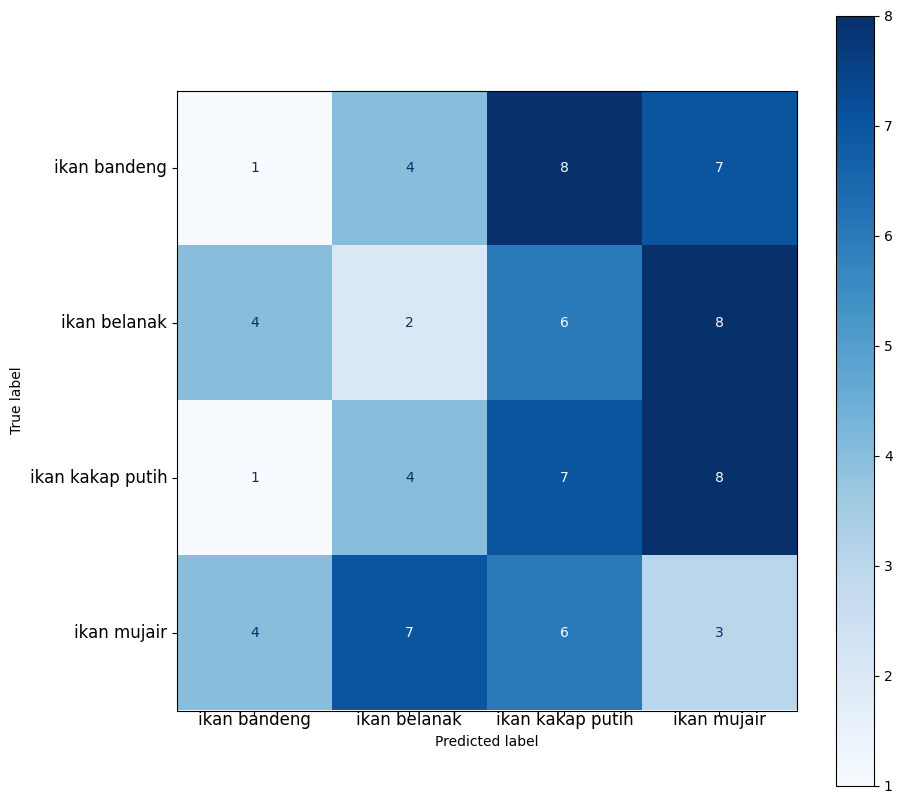

In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(prediction).idxmax(axis=1)

from sklearn.metrics import ConfusionMatrixDisplay

ikan = ['ikan bandeng', 'ikan belanak', 'ikan kakap putih', 'ikan mujair']
confusion_matrix= metrics.confusion_matrix(categorical_test_labels, categorical_preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=ikan)

# Set font size and rotation for the labels
font_dict = {'fontsize': 12, 'verticalalignment': 'center'}

# Plot the confusion matrix with customized label appearance
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal', values_format='d')

# Customize the appearance of the labels on x-axis and y-axis
ax.set_xticklabels(ikan, fontdict=font_dict)
ax.set_yticklabels(ikan, fontdict=font_dict)

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path folder dataset di Google Drive
data_folder_path = '/content/drive/MyDrive/dataset/'

# List untuk menyimpan data gambar dan label
images = []
labels = []

# Loop melalui setiap subfolder dalam folder dataset
label_mapping = {'label1': 1, 'label2': 2, 'label3': 3, 'label4': 4}  # Mapping label asli ke label angka 1 sampai 4
for subfolder_name in os.listdir(data_folder_path):
    subfolder_path = os.path.join(data_folder_path, subfolder_name)
    if os.path.isdir(subfolder_path):
        label = label_mapping[subfolder_name]  # Mengubah label asli menjadi angka 1 sampai 4
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                file_path = os.path.join(subfolder_path, file_name)
                image = tf.keras.preprocessing.image.load_img(file_path, target_size=(32, 32))
                image_array = tf.keras.preprocessing.image.img_to_array(image)
                images.append(image_array)
                labels.append(label)

# Konversi list menjadi numpy array
images = np.array(images)
labels = np.array(labels)

# Inisialisasi K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Loop melalui setiap fold
fold = 1
for train_index, val_index in kf.split(images):
    print(f"Fold {fold}")

    # Membagi data menjadi data training dan data validasi
    x_train_fold, x_val_fold = images[train_index], images[val_index]
    y_train_fold, y_val_fold = labels[train_index], labels[val_index]

    # Membuat model CNN
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))  # Output layer dengan 4 kelas

    # Kompilasi model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Melatih model dengan data training
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # Evaluasi model dengan data validasi
    _, accuracy = model.evaluate(x_val_fold, y_val_fold)
    print(f"Fold {fold} - Validation Accuracy: {accuracy}")

    fold += 1

# **MODEL PERHITUNGAN MANUAL**

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Concatenate

input_layer = keras.Input(shape=(15,15,3))

conv1 = tf.keras.layers.Conv2D(64, (3,3),strides=(2,2))(input_layer)
conv1 = tf.keras.layers.BatchNormalization()(conv1)
conv1 = tf.keras.layers.Activation('relu')(conv1)

pool = tf.keras.layers.AveragePooling2D((3,3),strides=(1,1),padding='same')(conv1)
conv2 = tf.keras.layers.Conv2D(32, (1,1), strides=(1,1), padding='same')(pool)
conv2 = tf.keras.layers.BatchNormalization()(conv2)
conv2 = tf.keras.layers.Activation('relu')(conv2)

conv3 = tf.keras.layers.Conv2D(64, (1,1), strides=(1,1), padding='same')(conv1)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.Activation('relu')(conv3)
conv3 = tf.keras.layers.Conv2D(96, (3,3), strides=(1,1), padding='same')(conv3)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.Activation('relu')(conv3)
conv3 = tf.keras.layers.Conv2D(96, (3,3), strides=(1,1), padding='same')(conv3)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.Activation('relu')(conv3)

conv4 = tf.keras.layers.Conv2D(48, (1,1), strides=(1,1), padding='same')(conv1)
conv4 = tf.keras.layers.BatchNormalization()(conv4)
conv4 = tf.keras.layers.Activation('relu')(conv4)
conv4 = tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='same')(conv4)
conv4 = tf.keras.layers.BatchNormalization()(conv4)
conv4 = tf.keras.layers.Activation('relu')(conv4)

conv5 = tf.keras.layers.Conv2D(64, (1,1), strides=(1,1), padding='same')(conv1)
conv5 = tf.keras.layers.BatchNormalization()(conv5)
conv5 = tf.keras.layers.Activation('relu')(conv5)

output = tf.keras.layers.Concatenate(axis=-1)([conv2, conv3, conv4, conv5])
output = tf.keras.layers.Flatten()(output)
output = tf.keras.layers.Dense(4,activation='softmax')(output)

model = Model(inputs=input_layer, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 15, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 7, 7, 64)     1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 7, 7, 64)    256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 7, 7, 64)     0           ['batch_normalization[0][0]']

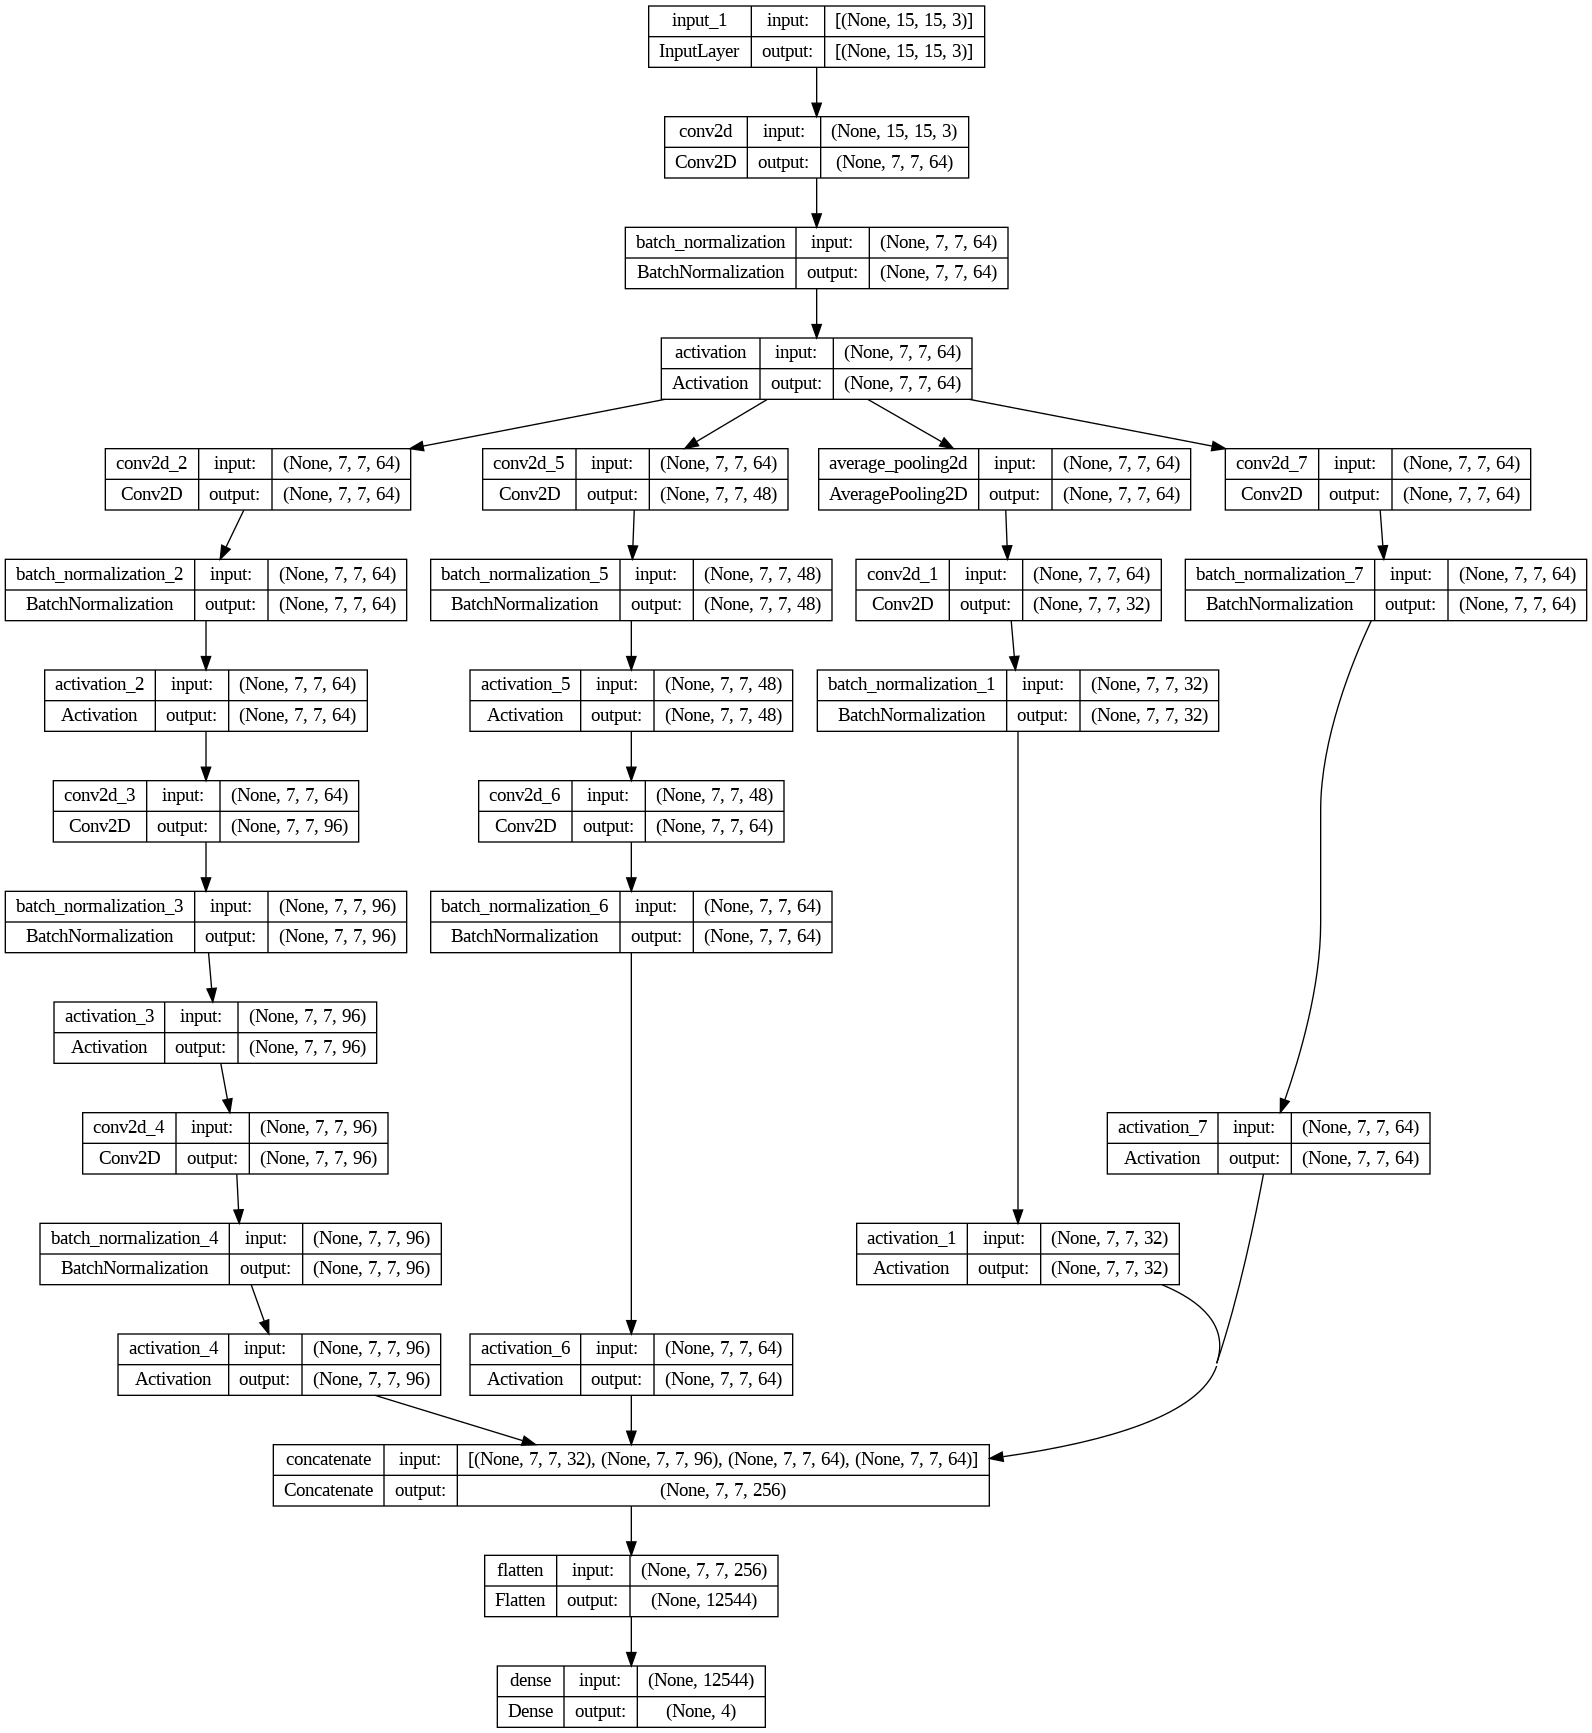

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

# **ANALISIS DATA**

In [ ]:
import numpy as np
import skimage.io as io
from copy import deepcopy

ikan = io.imread ('/content/drive/MyDrive/train_dir/ikan_bandeng/ikan_bandeng_0.jpg')

red_channel= deepcopy(ikan)
green_channel= deepcopy(ikan)
blue_channel= deepcopy(ikan)

red_channel[:,:,1]=0
red_channel[:,:,2]=0

green_channel[:,:,0]=0
green_channel[:,:,2]=0

blue_channel[:,:,0]=0
blue_channel[:,:,1]=0

fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0,0].imshow(ikan)
ax[0,0].set_title('original')

ax[0,1].imshow(red_channel)
ax[0,1].set_title('red_channel')

ax[1,0].imshow(green_channel)
ax[1,0].set_title('green_channel')

ax[1,1].imshow(blue_channel)
ax[1,1].set_title('blue_channel')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
img = mpimg.imread('/content/drive/MyDrive/test_dir/ikan_kakap_putih/ikan_kakap_putih_48.jpg')
imgplot = plt.imshow(img)

In [ ]:
from PIL import Image
i = Image.open('/content/drive/MyDrive/test_dir/ikan_kakap_putih/ikan_kakap_putih_48.jpg')

pixels = i.load() # this is not a list, nor is it list()'able
width, height = i.size

all_pixels = []
for x in range(width):
    for y in range(height):
        cpixel = pixels[x, y]
        all_pixels.append(cpixel)

all_pixels

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/test_dir/ikan_kakap_putih/ikan_kakap_putih_48.jpg')

print(img.shape) # (152, 203, 3) = (tinggi, lebar, channel gambar)
print(img[0][0][0]) # mengakses pixel warna BIRU di titik paling kiri atas
print(img[0][0][1]) # mengakses pixel warna HIJAU di titik paling kiri atas
print(img[0][0][2])

In [ ]:
print(cv2.mean(img))

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/test_dir/ikan_kakap_putih/ikan_kakap_putih_48.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
print(img.shape)
print(img.ndim)

In [ ]:
import numpy as np

# Contoh batch data
batch = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Hitung rata-rata dan variansi batch terkini
batch_mean = np.mean(batch, axis=0)
batch_variance = np.var(batch, axis=0)

# Hitung rata-rata dari seluruh batch
overall_mean = np.mean(batch_mean)

# Hitung akar kuadrat dari variansi batch terkini
overall_variance = np.sqrt(np.mean(batch_variance))

# Hitung parameter shift (bias)
shift = overall_mean - batch_mean

# Hitung parameter scale (scale factor)
scale = overall_variance / np.sqrt(batch_variance)

print("Parameter Shift (Bias):")
print(shift)
print("Parameter Scale (Scale Factor):")
print(scale)


Parameter Shift (Bias):
[ 1.  0. -1.]
Parameter Scale (Scale Factor):
[1. 1. 1.]
